In [ ]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
#########Load MNIST & Images

In [ ]:
x = X[4,0,:,:]

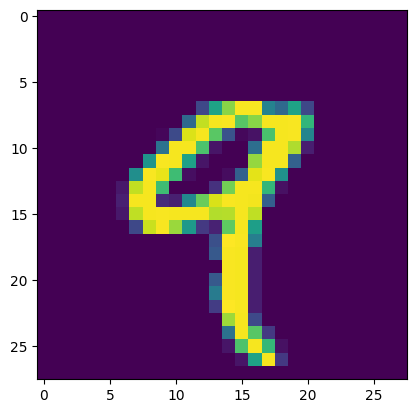

In [ ]:
plt.imshow(x)

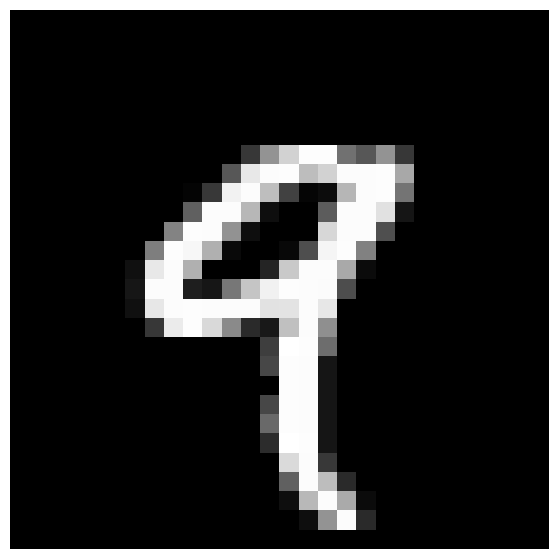

In [ ]:
plot(x)

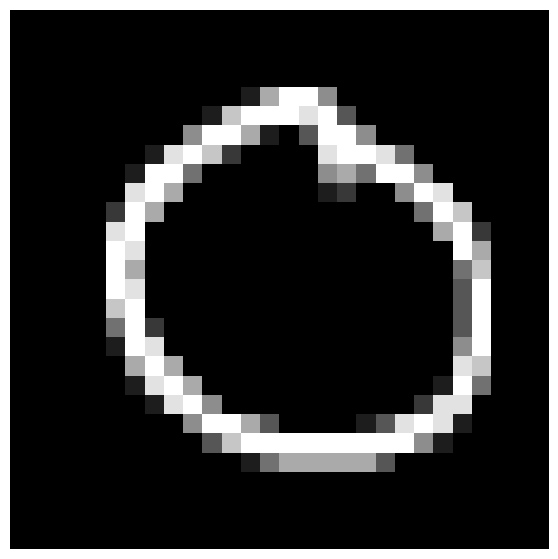

In [ ]:
plot(X[68,0,:,:])

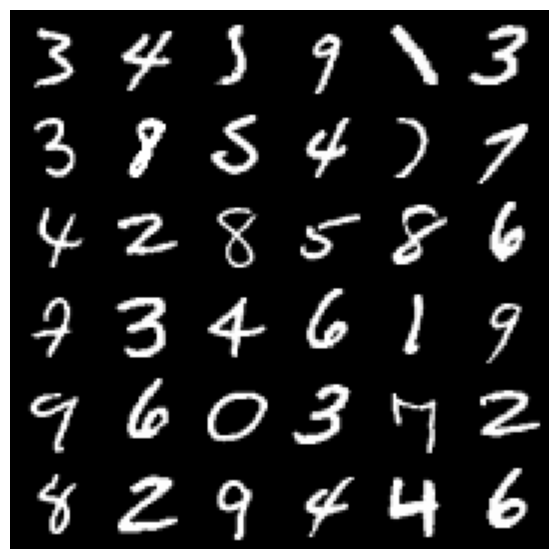

In [ ]:
montage_plot(X[130:166,0,:,:])

In [ ]:
#########Random-y=mx

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X = X.T

In [ ]:
x = X[:,0:64]

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

In [ ]:
M = GPU(np.random.rand(10,784))

In [ ]:
y = M@x

In [ ]:
torch.max(y,0)

torch.return_types.max(
values=tensor([58.6551, 64.1757, 40.7599, 36.9347, 50.8219, 62.7213, 38.5617, 75.4863,
        24.3814, 46.8579, 58.9183, 32.6853, 74.8560, 60.6690, 25.7357, 53.9933,
        50.8833, 58.1774, 29.1912, 38.5581, 72.3543, 75.5664, 32.5631, 36.2833,
        50.2001, 84.6777, 30.7471, 94.3802, 87.4346, 37.0023, 57.1387, 69.2458,
        37.2340, 45.8221, 76.6525, 35.2176, 66.1654, 76.0096, 47.0120, 58.6904,
        29.4208, 60.2221, 29.2539, 38.7294, 37.5496, 53.3565, 49.9807, 49.2435,
        35.4862, 67.7698, 38.3390, 94.6638, 60.8037, 37.1050, 52.3156, 68.7645,
        86.7968, 45.3038, 69.7200, 36.9736, 64.8339, 38.7541, 62.2160, 95.7855],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([3, 3, 3, 6, 1, 2, 0, 3, 9, 1, 9, 2, 9, 3, 1, 3, 3, 3, 1, 9, 2, 2, 3, 6,
        9, 3, 0, 3, 2, 9, 9, 1, 1, 6, 1, 6, 9, 1, 2, 3, 2, 3, 9, 9, 0, 2, 9, 3,
        3, 6, 9, 6, 2, 6, 3, 2, 2, 3, 0, 2, 2, 6, 0, 1], device='cuda:0'))

In [ ]:
y = torch.argmax(y,0)

In [ ]:
Y[0:64]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4., 3., 5., 3., 6., 1., 7., 2., 8.,
        6., 9., 4., 0., 9., 1., 1., 2., 4., 3., 2., 7., 3., 8., 6., 9., 0., 5.,
        6., 0., 7., 6., 1., 8., 7., 9., 3., 9., 8., 5., 9., 3., 3., 0., 7., 4.,
        9., 8., 0., 9., 4., 1., 4., 4., 6., 0.], device='cuda:0')

In [ ]:
y == Y[0:64]

tensor([False, False, False, False, False,  True, False,  True, False, False,
        False, False, False, False,  True, False, False, False, False,  True,
        False, False, False, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False], device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))

tensor(7, device='cuda:0')

In [ ]:
torch.sum((y == Y[0:64]))/64

tensor(0.1094, device='cuda:0')

In [ ]:
batch_size = 64

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.0938, device='cuda:0')

In [ ]:
M_Best = 0
Score_Best = 0

for i in range(100000):

    M_new = GPU(np.random.rand(10,784))

    y = M_new@x

    y = torch.argmax(y,0)

    Score = (torch.sum((y == Y[0:batch_size]))/batch_size).item()

    if Score > Score_Best:

        Score_Best = Score
        M_Best = M_new

        print(i,Score_Best)



0 0.109375
1 0.171875
3 0.1875
33 0.203125
64 0.21875
222 0.28125
3649 0.296875
11636 0.3125
71292 0.328125
88233 0.34375


In [ ]:
#########Random Walk

In [ ]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [ ]:
def plot(x,title=None):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)
    plt.show()

In [ ]:
##MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
m = np.random.standard_normal((10,784))

In [ ]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [ ]:
x = X[0:2,:]

In [ ]:
x = x.T

In [ ]:
y = m@x

In [ ]:
np.max(y, axis=0)

array([20.02775899, 21.89108826])

In [ ]:
y = np.argmax(y, axis=0)

In [ ]:
np.sum((y == y_ans))/len(y)

0.0

In [ ]:
X = X.T

In [ ]:
X_test = X_test.T

In [ ]:
y = m@X

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.15486666560173035
0.16521666944026947
0.18451666831970215
0.18853333592414856
0.19403333961963654
0.19866666197776794
0.20098333060741425
0.20133332908153534
0.22020000219345093
0.22486667335033417
0.22785000503063202
0.23026667535305023
0.23428334295749664
0.2414666712284088
0.24719999730587006
0.25218334794044495
0.2628999948501587
0.265666663646698
0.2709999978542328
0.27498334646224976
0.2850666642189026
0.29216668009757996
0.2928333282470703
0.29393333196640015
0.2945333421230316
0.2962166666984558
0.3021000027656555
0.30658334493637085
0.30790001153945923
0.30971667170524597
0.3105166554450989
0.31113332509994507
0.3121333420276642
0.318616658449173
0.3203499913215637
0.3224000036716461
0.3258666694164276
0.3280166685581207
0.3313833475112915
0.33709999918937683
0.33845001459121704
0.34148332476615906
0.3442166745662689
0.3443000018596649
0.34655001759529114
0.3479500114917755
0.34816667437553406
0.34835001826286316
0.35116666555404663
0.35501667857170105
0.3559333384037018
0.3

In [ ]:
m_random = GPU_data(np.random.randn(10,784))

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1)
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

tensor([0.1621, 0.1495, 0.1462, 0.1439, 0.1428, 0.1424, 0.1396, 0.1386, 0.1370,
        0.1345, 0.1329, 0.1288, 0.1259, 0.1251, 0.1240, 0.1235, 0.1227, 0.1220,
        0.1194, 0.1192, 0.1177, 0.1169, 0.1142, 0.1142, 0.1117, 0.1114, 0.1113,
        0.1108, 0.1095, 0.1095, 0.1090, 0.1089, 0.1070, 0.1065, 0.1058, 0.1057,
        0.1043, 0.1039, 0.1037, 0.1037, 0.1036, 0.1028, 0.1026, 0.1024, 0.1018,
        0.1016, 0.1005, 0.1002, 0.0992, 0.0988, 0.0979, 0.0977, 0.0976, 0.0973,
        0.0971, 0.0967, 0.0964, 0.0962, 0.0960, 0.0957, 0.0955, 0.0938, 0.0937,
        0.0937, 0.0934, 0.0926, 0.0923, 0.0917, 0.0914, 0.0901, 0.0900, 0.0898,
        0.0889, 0.0888, 0.0868, 0.0867, 0.0861, 0.0847, 0.0844, 0.0835, 0.0828,
        0.0808, 0.0804, 0.0797, 0.0792, 0.0791, 0.0779, 0.0773, 0.0760, 0.0754,
        0.0705, 0.0696, 0.0688, 0.0684, 0.0668, 0.0646, 0.0628, 0.0611, 0.0582,
        0.0565], device='cuda:0')

In [ ]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0
acc_best = 0

step = 0.00000000001

for i in range(1000000):

    y = torch.argmax((M@X), axis=1)
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[40:100] = 0
    M[0:50] = M[0]
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))


    acc = score[s][0].item()

    if acc > acc_best:

        m_best = M[0]
        acc_best = acc

        print(i,acc)

0 0.1496666669845581
3 0.17428334057331085
4 0.18303333222866058
5 0.2038000077009201
6 0.2217833399772644
7 0.22753334045410156
8 0.23818333446979523
9 0.25148335099220276
10 0.2695166766643524
11 0.28290000557899475
12 0.29446667432785034
13 0.3021666705608368
14 0.3073166608810425
15 0.31921666860580444
16 0.3295666575431824
17 0.33070001006126404
18 0.34226667881011963
19 0.3500500023365021
20 0.3517500162124634
21 0.3563166558742523
22 0.36125001311302185
23 0.36959999799728394
24 0.37433335185050964
25 0.3781999945640564
26 0.3838833272457123
27 0.38795000314712524
28 0.3917500078678131
29 0.4047333300113678
30 0.4089166820049286
31 0.4144333302974701
32 0.4230833351612091
33 0.42731666564941406
34 0.428849995136261
35 0.4297666847705841
36 0.4317166805267334
37 0.43345001339912415
38 0.43833333253860474
39 0.4394499957561493
40 0.44663333892822266
41 0.44956666231155396
42 0.4535500109195709
43 0.4593833386898041
44 0.4612833261489868
45 0.46593335270881653
46 0.4681166708469391